## Store Sales Forecasting

Packages

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Collection

#### 1.1. Describe the data set.
The dataset is a comprehensive collection of over **9000+ orders** from various customers across different regions. It comprises **17 columns** and **9801 rows**.

Our goal is to **predict the sales** of the products based on the given features.

## **Features**
1. **Row ID** 
2. **Order ID**: Unique ID for each order
3. **Order Date**: Date of the order
4. **Ship Date**: Date of the shipment
5. **Ship Mode**: Mode of shipment
6. **Customer ID**: Unique ID for each customer
7. **Customer Name**: Name of the customer
8. **Segment**: Segment of the customer
9. **Country**: Country of the customer
10. **City**: City of the customer
11. **State**: State of the customer
12. **Postal Code**: Postal code of the customer
13. **Region**: Region of the customer
14. **Product ID**: Unique ID for each product
15. **Category**: Category of the product
16. **Sub-Category**: Sub-Category of the product
17. **Product Name**: Name of the product
18. **Sales**: Sales of the product

To access the dataset, click [https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data).

In [59]:
# load CSV file 
df = pd.read_csv("C:/Users/bibov/OneDrive/Documents/Data Analysis Final Req/train.csv")

In [60]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# 2. Data Preperation

#### 2.1 Data Inspection 🔍
 Checking the data types, looking for missing values, and understanding the categorical feilds.

#### 2.2 Data Cleaning 🧹
Removing the missing values, duplicates, or irrelevant data.

#### 2.3 Data Partioning 📂
Splitting the data into there respective data types i.e. **Numerical** and **Categorical**. Also, getting the list of **Target Variables**.


In [61]:
# checking the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

base on the output of checking the data types, we can see that the data types of teh date columns are not correct, and the postal code are in float type, postal codes are usually not used in mathematical operations, so we will change it to string type.



In [62]:
# Date conversion
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# postal code conversion
df['Postal Code'] = df['Postal Code'].astype(str)

# checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [63]:
# check for missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

in checking the missing value the output shows that there are no missing values in the dataset.


# 3. Exploratory Data Analysis

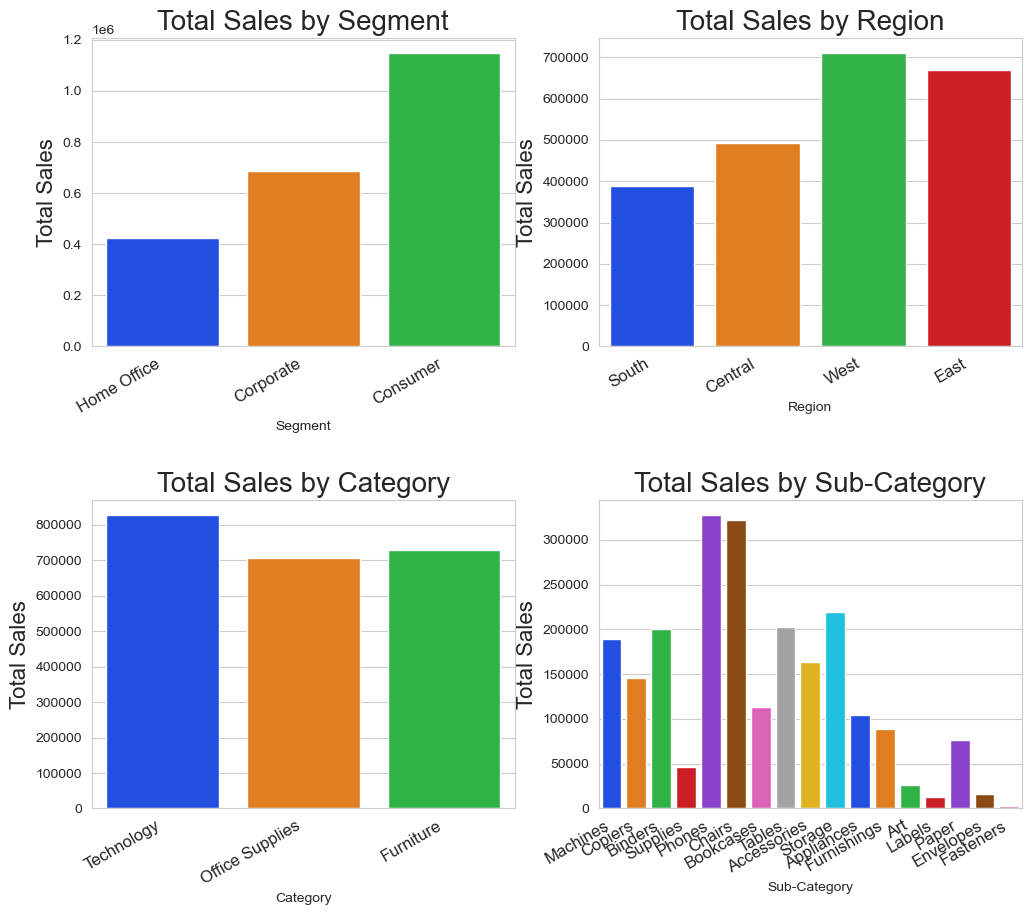

In [64]:
df = df.sort_values(by='Sales', ascending=False)

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# List of columns to plot
columns = ['Segment', 'Region', 'Category', 'Sub-Category']

# Create barplots for each column
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.barplot(x=column, y='Sales', data=df, estimator=np.sum, errorbar=None, palette='bright', ax=ax)
    ax.set_ylabel('Total Sales', fontsize=16)
    ax.set_title(f'Total Sales by {column}', fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=12)

# Display the plots
plt.show()

# 4. Model Building